In [227]:
from netgen.geom2d import SplineGeometry
from ngsolve import Mesh, VOL
import matplotlib.pyplot as plt
import numpy as np
from numpy import dot 

In [21]:
R = 10.
H = 1.

def CreateMesh( h_max = 2.):
    '''Creates a netgen mesh and returns the NG-solve wrapper.'''
    geo = SplineGeometry()
    geo.AddRectangle(p1=(-R,-H),
                    p2=( R, H),
                    bcs=["Gamma","Sigma_p","Gamma","Sigma_n"],
                    leftdomain=1,
                    rightdomain=0)
    geo.AddCircle(c=(0,0),
                r=0.4,
                bc="dOmega",
                leftdomain=2,
                rightdomain=1)
    geo.SetMaterial (1, "Omega_e")
    geo.SetMaterial (2, "Omega_i")

    Omega = Mesh(geo.GenerateMesh(maxh= h_max))
    
    return Omega

Omega = CreateMesh()

In [4]:
Interior = Omega.Materials('Omega_e | Omega_i')

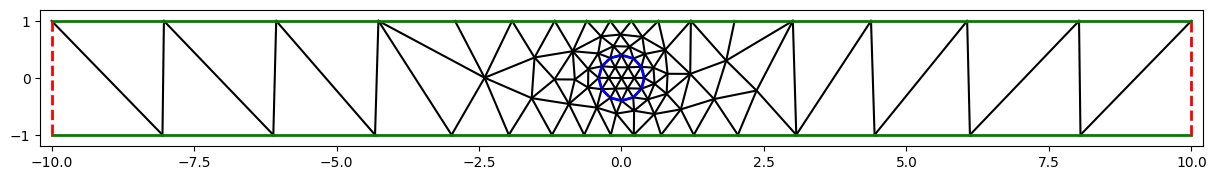

In [22]:
def plot_mesh( M : Mesh, ax : plt.Axes | None = None): 
    """Plots a mesh"""
    points = np.fromiter( (v.point for v in M.vertices), dtype=np.dtype((float, 2)), count=M.nv)
    
    if ax is None:
        _, ax = plt.subplots( figsize=(15,3))
    for l in M.edges:
        if len(l.elements) == 2:
            px, py = points[l.vertices[0].nr]
            qx, qy = points[l.vertices[1].nr]
            ax.plot( [px, qx], [py, qy], 'k')

    lw = 2

    for e in M.Boundaries("Gamma").Elements():
        px, py = points[e.vertices[0].nr]
        qx, qy = points[e.vertices[1].nr]
        ax.plot( [px, qx], [py, qy], 'g', linewidth=lw)

    for e in M.Boundaries("Sigma_p").Elements():
        px, py = points[e.vertices[0].nr]
        qx, qy = points[e.vertices[1].nr]
        ax.plot( [px, qx], [py, qy], '--r', linewidth=lw)

    for e in M.Boundaries("Sigma_n").Elements():
        px, py = points[e.vertices[0].nr]
        qx, qy = points[e.vertices[1].nr]
        ax.plot( [px, qx], [py, qy], '--r', linewidth=lw)


    for e in M.Boundaries("dOmega").Elements():
        px, py = points[e.vertices[0].nr]
        qx, qy = points[e.vertices[1].nr]
        ax.plot( [px, qx], [py, qy], '--b', linewidth=lw)


    #ax.scatter(x=points[:,0], y=points[:,1])
    d = 0.2
    ax.axis('square')
    ax.set_xlim([-R-d,R+d])
    ax.set_ylim([-H-d,H+d])


plot_mesh(Omega)


Lets check for counter clockwise-ness

In [23]:
# def cross_product(ux, uy, vx, vy):
#     cp = ux*vy - uy*vx
#     return cp

# vertices = list(Omega.vertices)

# triangles = list(Omega.faces)

# def is_counterclockwise(K):
#     px, py = vertices[K.vertices[0].nr].point
#     qx, qy = vertices[K.vertices[1].nr].point
#     rx, ry = vertices[K.vertices[2].nr].point
#     ux = qx - px
#     uy = qy - py 
#     vx = rx - px 
#     vy = ry - py
#     cp = cross_product(ux,uy,vx,vy)
#     return cp > 0

# for K in triangles:
#     print(is_counterclockwise(K))

    

I think its easier if we force it to be counter-clockwise

In [7]:
# cc_triangles = []
# for K in triangles:
#     if is_counterclockwise(K):
#         cc_triangles.append(K.vertices)
#     else:
#         cc_triangles.append((K.vertices[1],K.vertices[0],K.vertices[2]))

In [8]:
# def is_counterclockwise(K):
#     px, py = vertices[K[0].nr].point
#     qx, qy = vertices[K[1].nr].point
#     rx, ry = vertices[K[2].nr].point
#     ux = qx - px
#     uy = qy - py 
#     vx = rx - px 
#     vy = ry - py
#     cp = cross_product(ux,uy,vx,vy)
#     return cp > 0


# for K in cc_triangles:
#     print(is_counterclockwise(K))


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


The vertices in each triangle are not given in a clockwise or counter-clockwise manner in general. For that reason the normal vector is hardcoded.

In [31]:
def getNormal(p,q):
    px, py = p
    qx, qy = q
    tx, ty = q - p

    if py == qy == H:
        return [ 0.,  1.]
    if py == qy == -H:
        return [ 0., -1]
    if px == qx == R:
        return [ 1., 0.]
    if py == qy == -R:
        return [ -1., 0.]

    N = [ -ty, tx] / np.sqrt(tx**2 + ty**2)
    return N

def getTangent(p,q):
    px, py = p
    qx, qy = q
    tx, ty = q - p
    T = [ tx,  ty] / np.sqrt(tx**2 + ty**2)
    return T


from enum import Enum, auto

class EdgeType(Enum):
    Inner = auto()
    Gamma = auto()
    Sigma_L = auto()
    Sigma_R = auto() 

# def get_EdgeType(edge):
#     p = 


Vertices = np.array([ list(v.point) for v in Omega.vertices])
Edges = np.array([ [e.vertices[0].nr, e.vertices[1].nr]  for e in Omega.edges])
#Edge_labels = 
MidPoints = np.array([ (Vertices[e[0]] + Vertices[e[1]])/2 for e in Edges] )
Triangles = list(Omega.facets)



Normals = np.array( [ getNormal(Vertices[e[0]],Vertices[e[1]]) for e in Edges])
Tangents = np.array( [ getTangent(Vertices[e[0]],Vertices[e[1]]) for e in Edges])

Checking the orientation of the normals...

(-2.0, 2.0)

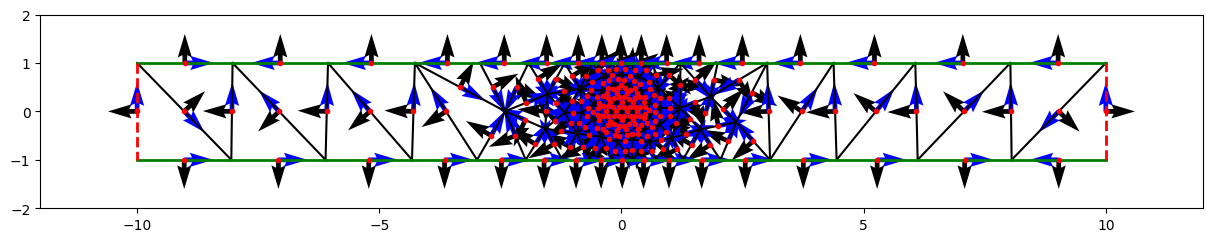

In [36]:
plot_mesh(Omega)
plt.plot( MidPoints[:,0], MidPoints[:,1],'.r')
plt.quiver( MidPoints[:,0], MidPoints[:,1], Normals[:,0], Normals[:,1], scale=40)
plt.quiver( MidPoints[:,0], MidPoints[:,1], Tangents[:,0], Tangents[:,1], scale=40, color='b')
plt.xlim([-12,12])
plt.ylim([-2,2])

In [45]:
for e in Omega.Elements():
    pass
e.type == 10

True

In [49]:
from ngsolve import BND

In [59]:
for s in Omega.Elements():
    print(s.mat)

Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_i
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_i
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_i
Omega_e
Omega_i
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_i
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_i
Omega_e
Omega_i
Omega_e
Omega_e
Omega_e
Omega_e
Omega_i
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_e
Omega_i
Omega_i
Omega_e
Omega_i
Omega_e
Omega_e
Omega_e
Omega_e
Omega_i
Omega_i
Omega_i
Omega_i
Omega_e


In [236]:
class TrefftzSpace:
    '''Defines a finite dimensional Trefftz space given
    a mesh, the number of plane-waves per element and 
    the wave-numbers.

    It can create test and trial functions, aswell as 
    actual functions.
    '''

    def __init__( self, Omega, DOF_per_element : tuple[int], kappa : dict[str, float] ):
        self.Omega = Omega
        self.N_elements = Omega.ne
        self.kappa = np.array( [ kappa[e.mat] for e in Omega.Elements()])
        th0 = 0.
        if hasattr(DOF_per_element, '__iter__'):
            assert Omega.ne == len(DOF_per_element)
            self.local_N_DOF = np.array( DOF_per_element )
        else:
            self.local_N_DOF = np.full_like(self.kappa, fill_value=DOF_per_element,dtype=np.int32)
        self.N_DOF = np.sum(self.local_N_DOF)
        # self.d =  [ list(map( lambda th: [ np.cos(th), np.sin(th)] , 
        #                               th0 + np.linspace(0, 2*np.pi, N, endpoint=False)))  for N in self.local_N_DOF] 

        self.d = [ np.array([[np.cos(th0 +th), np.sin(th0+th)] for th in np.linspace(0,2*np.pi,N,endpoint=False)]) 
                  for N in self.local_N_DOF ] 


        self.DOF_ownership = np.repeat( range(self.N_elements), self.local_N_DOF)
        self.DOF_start = np.cumsum(self.local_N_DOF) - self.local_N_DOF
        self.DOF_end = np.cumsum(self.local_N_DOF)
        self.DOF_range = [ list(range(s,e)) for (s,e) in zip(self.DOF_start,self.DOF_end)]
        self.global_to_local = np.array( [ n for N in self.local_N_DOF for n in range(N)])
    
class TrefftzFunction:
    def __init__( self, V, coeffs = 0.):
        '''Returns a Trefftz function with coefficients "coeffs"'''
        self.V = V
        self.coeffs = coeffs


    def Element(self, x, y ):
        return self.V.Omega(x,y).nr
    
    @property
    def coeffs( self ):
        return self._coeffs

    
    @coeffs.setter
    def coeffs( self, values):
        if hasattr(values, '__iter__'):
            assert self.V.N_DOF == len(values)
            self._coeffs = np.array(values)
        else:
            self._coeffs = np.full( self.V.N_DOF, values, dtype=np.complex128)

    
    def __call__(self, x, y ):
        e = self.Element(x,y)
        k = self.V.kappa[e]
        P = self.coeffs[self.V.DOF_range[e]]
        D = self.V.d[e]

        r = np.array([x,y])
        y = sum( p*np.exp(1j*k*dot(d,r)) for (p,d) in zip(P,D) )
        return y 

class TestFunction:
    
    def __init__(self, V):
        self.V = V

    
    def __iter__(self, n):
        e = self.V.DOF_ownership[n]
        k = self.V.kappa[e]
        d = self.V.d
        return { "d" : d, "k" : k}



    

In [239]:
V = TrefftzSpace(Omega, np.tile([2,3], Omega.ne//2),{"Omega_i" : 1. , "Omega_e" : 2.})
V.d[1]

# Nth = 10
# V = TrefftzSpace(Omega, Nth, {"Omega_i" : 15. , "Omega_e" : 7.})
V.global_to_local


array([0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2,
       0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2,
       0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0,

I will create three arrays, one which indicates the number of plane waves per element, another one with the coefficients and another one with their ownership.

In [219]:
# class TrefftzFun:
#     def __init__( self, Omega : Mesh, Np : list[int], kappa : list[float]):
#         assert Omega.ne == len(Np)
#         self.Ncoef = sum(Np) 
#         self.Np = Np
#         self.coefs = np.zeros(self.Ncoef, dtype=np.complex128)
#         self.kappa = kappa
       
#         self.e_to_coef = np.zeros( (Omega.ne,2), dtype=np.int32)
#         i = 0
#         for e in range(Omega.ne):
#             self.e_to_coef[e,:] = np.array( i, Np[e])
#             i += Np[e]
    

#     def set_coeffs( self, coeffs):
#         self.coefs = coeffs


#     def __call__(self, x, y ):
#         e_ID = Omega(x,y).nr
#         k = self.kappa[e_ID]
#         id0 = self.e_to_coef[e_ID,0]
#         y = sum( [self.coefs[id0+n] * np.exp(1j*k*(x*np.cos(th) + y*np.sin(th))) 
#                   for (n,th) in enumerate(np.linspace(0,2*np.pi, self.Np[e_ID], endpoint=False))] )
#         return y 



In [220]:
# Nth = 3
# Np = np.full(Omega.ne, Nth, dtype=np.int32) #homogeneous number of plane waves
# k_in = 70
# k_out = 7
# kappa = [ k_out if e.mat == "Omega_e" else k_in for e in Omega.Elements()]
# f = TrefftzFun(Omega, Np, kappa)

In [221]:
#f.set_coeffs(np.tile([1,0],Omega.ne))
#coeffs = np.random.randint(20,size=Nth*Omega.ne)
coeffs = 10*np.random.uniform(-1, 1, Nth*Omega.ne) + 10*1.j * np.random.uniform(-1, 1, Nth*Omega.ne)

#f.set_coeffs(coeffs)

In [222]:
f = TrefftzFunction(V,coeffs)

In [223]:
Ny = 50
Nx = 10*Ny
x = np.linspace(-R,R,Nx)
y = np.linspace(-H,H,Ny)
X, Y = np.meshgrid(x,y)

Z =  np.reshape([ f(x_, y_) for x_, y_ in zip( X.ravel(), Y.ravel()) ], [Ny,Nx])



(-1.0, 1.0)

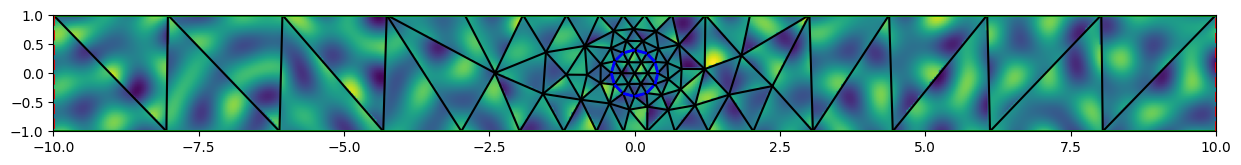

In [224]:
_, ax = plt.subplots( figsize=(15,3))
ax.imshow(np.real(Z), origin="lower", extent=[-R,R,-H,H])
plot_mesh(Omega, ax)
ax.axis('square')
ax.set_xlim([-R,R])
ax.set_ylim([-H,H])


(-1.0, 1.0)

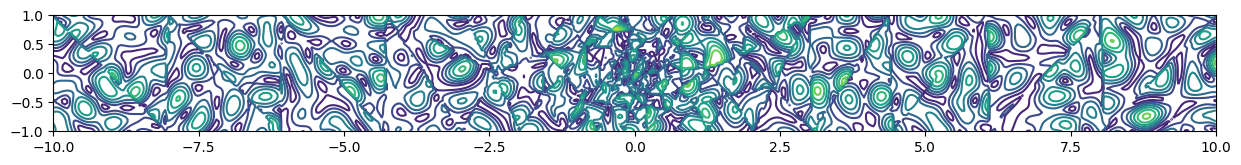

In [225]:
_, ax = plt.subplots( figsize=(15,3))
ax.contour(X,Y,np.abs(Z),10)
ax.axis('square')
ax.set_xlim([-R,R])
ax.set_ylim([-H,H])


# Naive Implementation:

This implementation should not be stable

In [226]:
N_DOF = V.N_DOF


A = np.zeros((N_DOF,N_DOF), dtype=np.complex128)
b = np.zeros((N_DOF), dtype=np.complex128)

In [232]:
for e, K in enumerate(V.Omega.Elements(VOL)):
    for  n in V.DOF_range[e]:
        for E in K.edges 


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
class Edge:
    '''Holds all the information from an edge that is needed:
    - P : inital vertex
    - Q : end point
    - N : normal
    - PQ : vector PQ
    - lenght : norm of PQ'''
    def __init__(self, P, Q, N ):
        self.P = P
        self.Q = Q
        self.N = N 
        self.PQ = Q - P
        self.lenght = norm(self.PQ)
        

In [19]:
from numpy import dot, exp
# from numpy.linalg import norm

def Gamma_term(phi, psi, edge):
    kd_n = phi.k * phi.d
    kd_m = psi.k * psi.d
    kd_mn = kd_n - kd_m
    
    N = edge.N
    P = edge.P 
    Q = edge.Q 
    tau = edge.tau

    I = dot(kd_m, N) / dot( kd_mn, tau) * ( exp(1j*dot(kd_mn,P)) - exp(1j*dot(kd_mn,Q)) )
    return I 

def same_elem_term(phi, psi, edge):
    kd_n = phi.k * phi.d
    kd_m = psi.k * psi.d
    kd_mn = kd_n - kd_m
    
    N = edge.N
    P = edge.P 
    Q = edge.Q 
    tau = edge.tau
    I = 0.5 * dot(kd_m + kd_n, N) / dot( kd_mn, tau) * ( exp(1j*dot(kd_mn,P)) - exp(1j*dot(kd_mn,Q)) )
    return I 



In [ ]:
class FiniteTrefftzSpace:
    '''allows the creation of test and trial functions, at least'''
    def __init__(self, Omega, local_degrees : tuple[int], kappa : tuple[float]):
        self.local_degrees = local_degrees
        self.kappa = kappa
    
    def TestFunction(self, n )

